In [67]:
# # %pip install pandas 
# # %pip install matplotlib
# %pip install seaborn numpy

In [68]:
# %pip install openpyxl

In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df_train=pd.read_excel('Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [71]:
df_test=pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [72]:
final_df=pd.concat([df_train,df_test],ignore_index=True)

In [73]:
final_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [74]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [75]:
final_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [76]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [77]:
for i in final_df.select_dtypes(include='object').columns:
    final_df[i]=final_df[i].fillna(final_df[i].mode()[0])

In [78]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
dtype: int64

In [79]:
final_df.duplicated().sum()

np.int64(246)

In [80]:
final_df.drop_duplicates(inplace=True)

In [81]:
final_df.duplicated().sum()

np.int64(0)

In [82]:
final_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [83]:
final_df['Date_of_Journey'].str.split("/").str[0]

0        24
1         1
2         9
3        12
4        01
         ..
13349     6
13350    27
13351     6
13352     6
13353    15
Name: Date_of_Journey, Length: 13108, dtype: object

In [84]:
final_df['Date']=final_df['Date_of_Journey'].str.split("/").str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split("/").str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split("/").str[2]


In [85]:
final_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [86]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019


In [87]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)


In [88]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13108 entries, 0 to 13353
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13108 non-null  object 
 1   Source           13108 non-null  object 
 2   Destination      13108 non-null  object 
 3   Route            13108 non-null  object 
 4   Dep_Time         13108 non-null  object 
 5   Arrival_Time     13108 non-null  object 
 6   Duration         13108 non-null  object 
 7   Total_Stops      13108 non-null  object 
 8   Additional_Info  13108 non-null  object 
 9   Price            10463 non-null  float64
 10  Date             13108 non-null  int64  
 11  Month            13108 non-null  int64  
 12  Year             13108 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 1.4+ MB


In [89]:
final_df["Arrival_Time"]=final_df['Arrival_Time'].str.split(" ").str[0]

In [90]:
final_df['Arrival_Hour']=final_df['Arrival_Time'].str.split(":").str[0].astype(int)
final_df['Arrival_Min']=final_df['Arrival_Time'].str.split(":").str[1].astype(int)

In [91]:
final_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [92]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [93]:
final_df.tail()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
13349,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,NaN,6,6,2019,20,25
13350,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,NaN,27,3,2019,16,55
13351,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,NaN,6,3,2019,4,25
13352,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,NaN,6,3,2019,19,15
13353,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,04:55,14h 20m,1 stop,No info,NaN,15,6,2019,19,15


In [94]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13108 entries, 0 to 13353
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13108 non-null  object 
 1   Source           13108 non-null  object 
 2   Destination      13108 non-null  object 
 3   Route            13108 non-null  object 
 4   Dep_Time         13108 non-null  object 
 5   Duration         13108 non-null  object 
 6   Total_Stops      13108 non-null  object 
 7   Additional_Info  13108 non-null  object 
 8   Price            10463 non-null  float64
 9   Date             13108 non-null  int64  
 10  Month            13108 non-null  int64  
 11  Year             13108 non-null  int64  
 12  Arrival_Hour     13108 non-null  int64  
 13  Arrival_Min      13108 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 1.5+ MB


In [95]:
final_df['Dep_Hour']=final_df['Dep_Time'].str.split(":").str[0].astype(int)
final_df['Dep_Min']=final_df['Dep_Time'].str.split(":").str[1].astype(int)


In [96]:
final_df.drop(['Dep_Time'],axis=1,inplace=True)

In [97]:
final_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50


In [98]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [99]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3, '4 stops':4})

In [100]:
final_df.drop(['Route'],axis=1,inplace=True)

In [101]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302.0,1,3,2019,21,35,16,50


In [102]:
final_df['Duration_Hour']=final_df['Duration'].str.split(" ").str[0].str.split("h").str[0]


In [103]:
final_df[final_df['Duration_Hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327.0,6,3,2019,16,55,16,50,5m
13343,Air India,Mumbai,Hyderabad,5m,2,No info,NaN,12,3,2019,16,55,16,50,5m


In [104]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(13343,axis=0,inplace=True)

In [105]:
final_df['Duration_Hour']=final_df['Duration_Hour'].astype(int)

In [106]:
final_df['Duration_Min']=final_df['Duration'].str.split(" ").str[1].str.split('m').str[0]

In [107]:
final_df['Duration_Min'].head()

0     50
1     25
2    NaN
3     25
4     45
Name: Duration_Min, dtype: object

In [108]:
final_df['Duration_Min']=final_df['Duration_Min'].fillna(0)

In [109]:
final_df['Duration_Min']=final_df['Duration_Min'].astype(int)

In [110]:
final_df.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2644
Date                  0
Month                 0
Year                  0
Arrival_Hour          0
Arrival_Min           0
Dep_Hour              0
Dep_Min               0
Duration_Hour         0
Duration_Min          0
dtype: int64

In [111]:
final_df.drop(['Duration'],axis=1,inplace=True)

In [112]:
final_df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,1,No info,NaN,6,6,2019,20,25,20,30,23,55
13350,IndiGo,Kolkata,Banglore,0,No info,NaN,27,3,2019,16,55,14,20,2,35
13351,Jet Airways,Delhi,Cochin,1,No info,NaN,6,3,2019,4,25,21,50,6,35
13352,Air India,Delhi,Cochin,1,No info,NaN,6,3,2019,19,15,4,0,15,15


In [113]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13106 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13106 non-null  object 
 1   Source           13106 non-null  object 
 2   Destination      13106 non-null  object 
 3   Total_Stops      13106 non-null  int64  
 4   Additional_Info  13106 non-null  object 
 5   Price            10462 non-null  float64
 6   Date             13106 non-null  int64  
 7   Month            13106 non-null  int64  
 8   Year             13106 non-null  int64  
 9   Arrival_Hour     13106 non-null  int64  
 10  Arrival_Min      13106 non-null  int64  
 11  Dep_Hour         13106 non-null  int64  
 12  Dep_Min          13106 non-null  int64  
 13  Duration_Hour    13106 non-null  int64  
 14  Duration_Min     13106 non-null  int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 1.6+ MB


In [114]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# Visualization

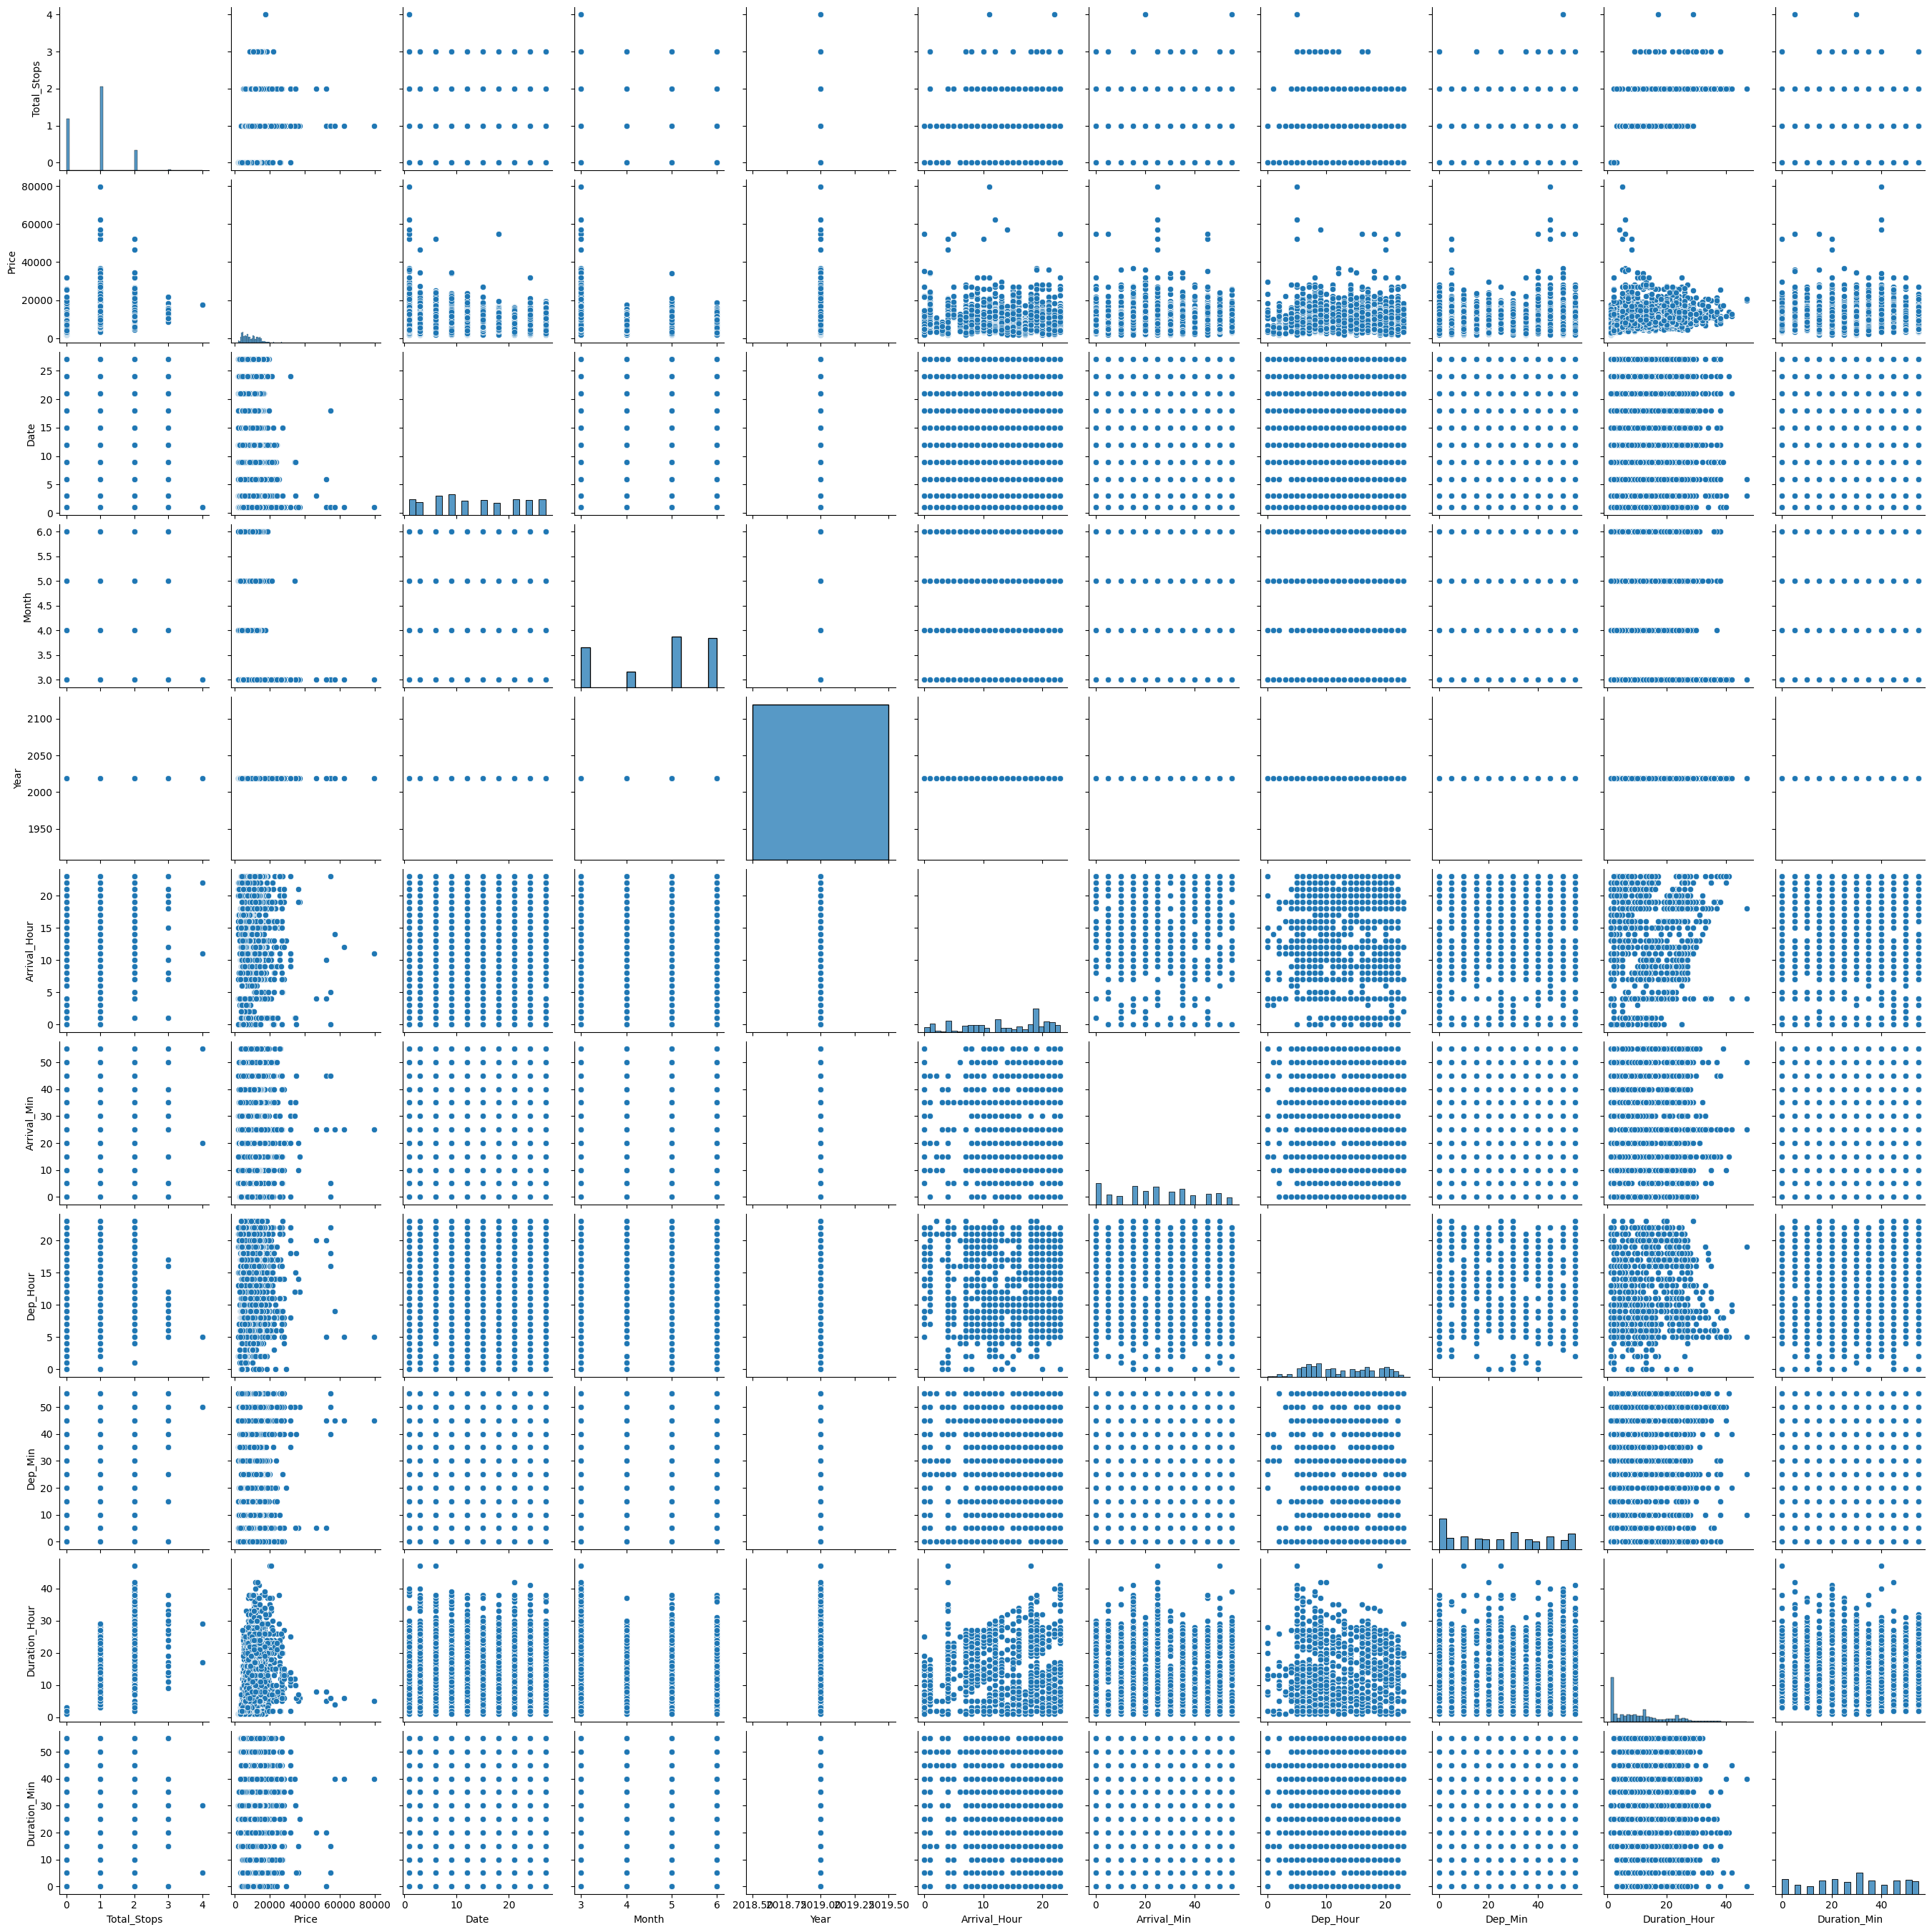

In [115]:
sns.pairplot(final_df)

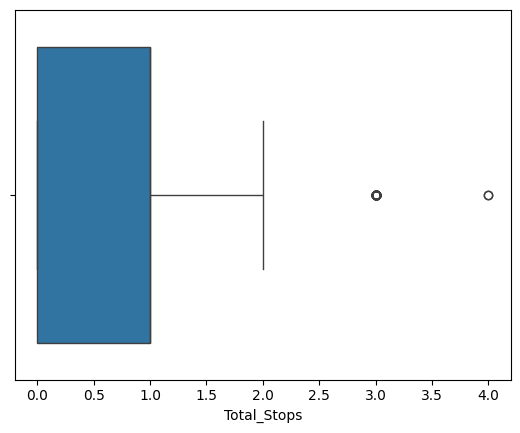

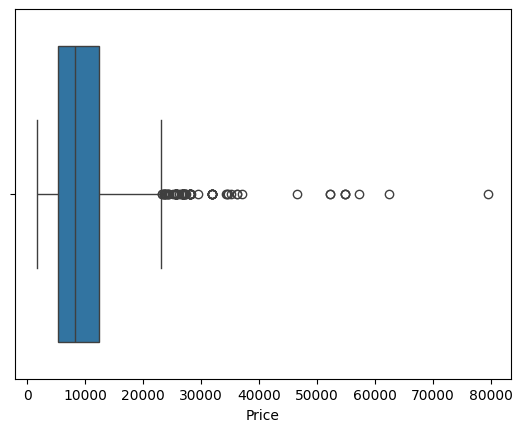

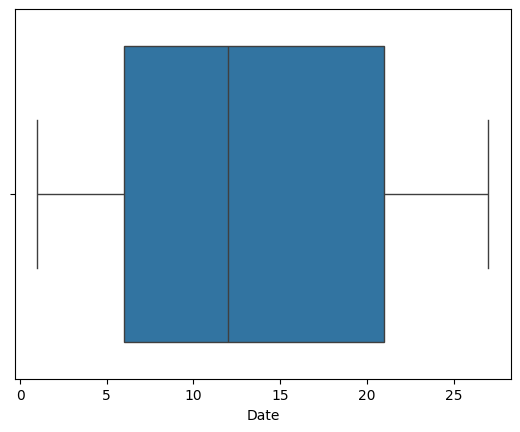

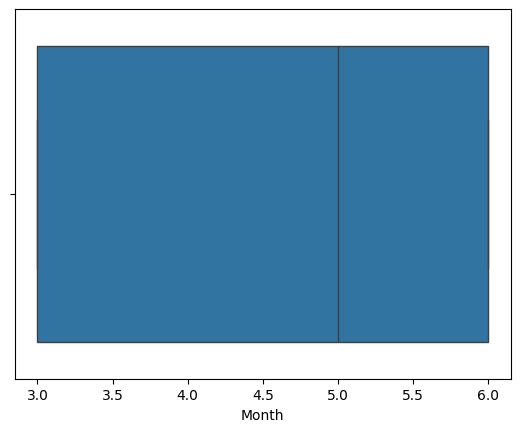

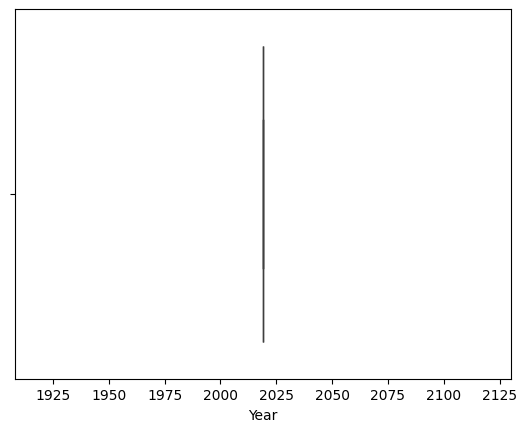

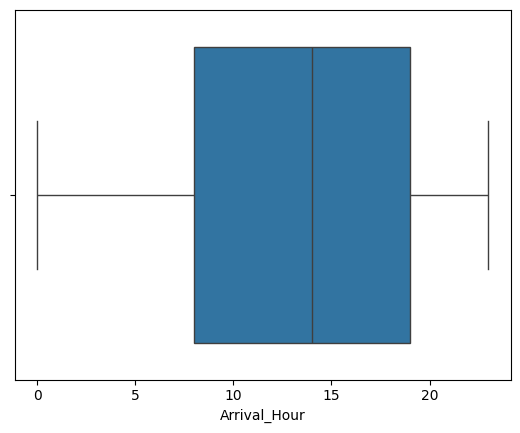

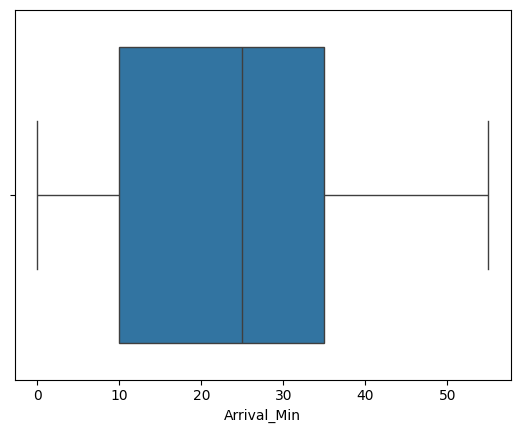

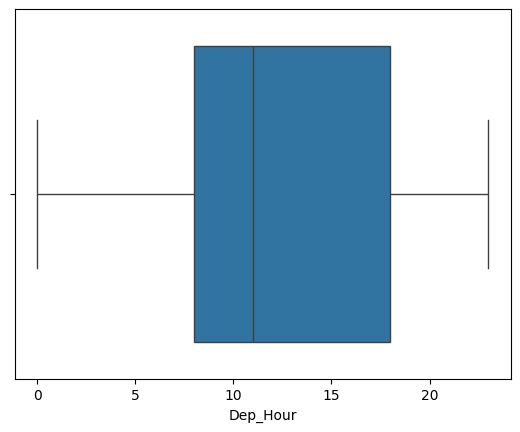

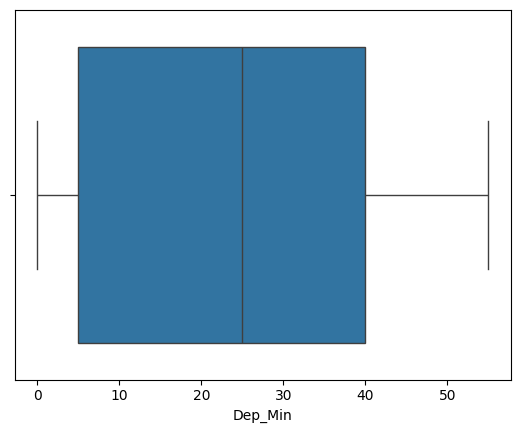

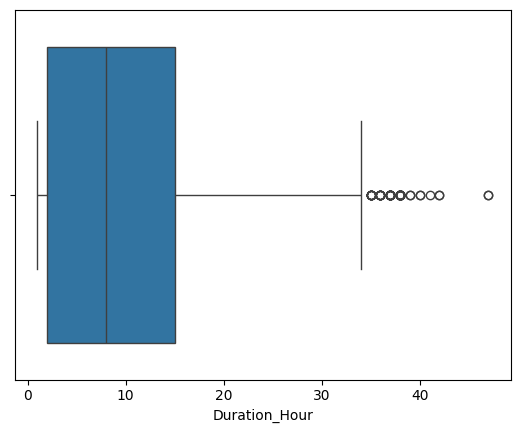

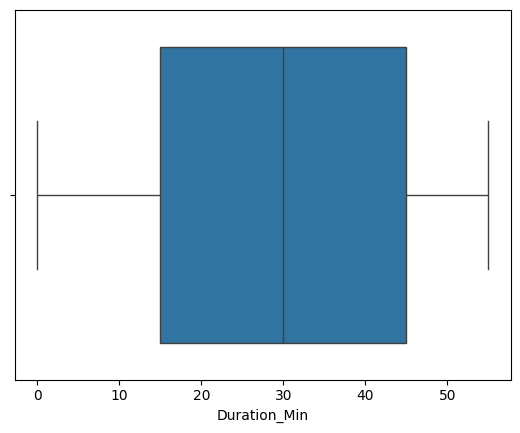

In [116]:
for i in final_df.select_dtypes(exclude='object').columns:
    sns.boxplot(x=i,data=final_df)
    plt.show()

# Training and Testing

In [117]:
# %pip install scikit-learn

In [118]:
from sklearn.preprocessing import LabelEncoder


In [119]:
le=LabelEncoder()

In [120]:
final_df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Arrival_Hour', 'Arrival_Min',
       'Dep_Hour', 'Dep_Min', 'Duration_Hour', 'Duration_Min'],
      dtype='object')

In [126]:
final_df['Airline']=le.fit_transform(final_df['Airline'])
final_df['Source']=le.fit_transform(final_df['Source'])
final_df['Destination']=le.fit_transform(final_df['Destination'])
final_df['Additional_Info']=le.fit_transform(final_df['Additional_Info'])

In [131]:
final_df.shape

(13106, 15)

In [127]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Dep_Hour,Dep_Min,Duration_Hour,Duration_Min
0,3,0,5,0,8,3897.0,24,3,2019,1,10,22,20,2,50
1,1,3,0,2,8,7662.0,1,5,2019,13,15,5,50,7,25
2,4,2,1,2,8,13882.0,9,6,2019,4,25,9,25,19,0
3,3,3,0,1,8,6218.0,12,5,2019,23,30,18,5,5,25
4,3,0,5,1,8,13302.0,1,3,2019,21,35,16,50,4,45


In [128]:
from sklearn.preprocessing import OneHotEncoder

In [129]:
ohe=OneHotEncoder()

In [125]:
final_df['Airline']=ohe.fit_transform(final_df['Airline'])
final_df['Source']=ohe.fit_transform(final_df['Source'])
final_df['Destination']=ohe.fit_transform(final_df['Destination'])
final_df['Additional_Info']=ohe.fit_transform(final_df['Additional_Info'])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.